In [ ]:
import json
import cv2
import os
import time
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pylab as plt

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image

from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result_pyplot, init_detector
from pycocotools.mask import encode, decode, area, toBbox

def imshow(img, win_name='', wait_time=0): 
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)

mmcv_image.imshow = imshow


(1000, 1000)
max:  1.0
min:  0.0
{0.0: 998947, 1.0: 1053}


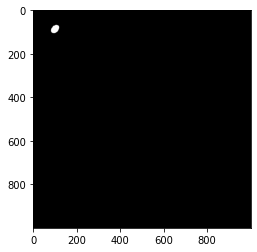

In [3]:
mask = '/home/eritup45/NYCU/VRDL/hw3_instance_segmentation/data/train/TCGA-18-5592-01Z-00-DX1/masks/mask_0001.png'

# img = Image.open(mask).convert('L')
# print(img.size)

# img = cv2.imread(mask, 1)
# img = img[:, :, ::-1] 	# transform image to rgb
img = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
img = img / 255

print(img.shape)
print('max: ', img.max())
print('min: ', img.min())

unique, counts = np.unique(img, return_counts=True)
print(dict(zip(unique, counts)))

# plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()


bbs: (46.0, 408.0, 41.0, 43.0)
area: 1370
encoded: {'size': [1000, 1000], 'counts': b'Q[]17mn06M3L3M3M3M3N2M3M2O2N100O100N20000O100O1000O100000001N10001N101N101N1O2N2N3K4K6G\\Vkk0'}
dimg.shape: (1000, 1000)


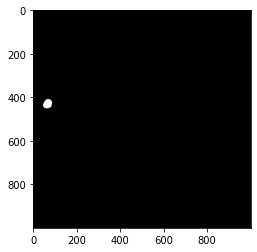

In [8]:
# Get RLE (pycocotools encode)
mask = '/home/eritup45/NYCU/VRDL/hw3_instance_segmentation/data/train/TCGA-18-5592-01Z-00-DX1/masks/mask_0049.png'
fpath = mask
img = cv2.imread(fpath, 0)

# Get RLE, area, bbox
encoded = encode(np.asfortranarray(img))
dimg = decode(encoded)
rle_area = area(encoded)
[x, y, w, h] = toBbox(encoded)
trans = encoded['counts'].decode("utf-8")
encoded['counts'] = trans

print(f'bbs: {[x, y, w, h]}')
print(f'area: {rle_area}')
print(f'encoded: {encoded}')
print(f'dimg.shape: {dimg.shape}')

plt.imshow(dimg, cmap='gray', vmin=0, vmax=1)
plt.show()



(1000, 1000)
(68, 104)
top: [68]
(69, 102)
top: [68, 69]
(70, 100)
top: [68, 69, 70]
(71, 95)
top: [68, 69, 70, 71]
(72, 94)
top: [68, 69, 70, 71, 72]
(73, 93)
top: [68, 69, 70, 71, 72, 73]
(74, 92)
top: [68, 69, 70, 71, 72, 73, 74]
(75, 91)
top: [68, 69, 70, 71, 72, 73, 74, 75]
(76, 90)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76]
(77, 90)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
(78, 89)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
(79, 89)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
(80, 88)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
(81, 87)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
(82, 86)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
(83, 85)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
(84, 85)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
(85, 84)
top: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
(86, 84)
top: [68, 69, 70, 71,

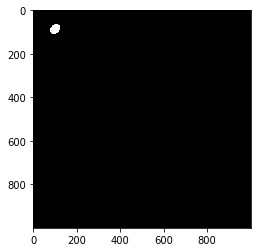

In [14]:
# Get bbox
print(img.shape)
h, w = img.shape
imshow(img)

top, down, left, right = [], [], [], []

for row in range(h):
    for col in range(w):
        if img[row, col] != 0:
            # top = row
            top.append(row)
            print(f'{(row, col)}')
            print(f'top: {top}')
            break

for row in range(h-1, 0, -1):
    for col in range(w):
        if img[row, col] != 0:
            # down = row
            down.append(row)
            print(f'{(row, col)}')
            print(f'down: {down}')
            break

for col in range(w):
    for row in range(h):
        if img[row, col] != 0:
            # left = col
            left.append(col)
            print(f'{(row, col)}')
            print(f'left: {left}')
            break

for col in range(w-1, 0, -1):
    for row in range(h):
        if img[row, col] != 0:
            # right = col
            right.append(col)
            print(f'{(row, col)}')
            print(f'right: {right}')
            break

print(top)
print(down)
print(left)
print(right)


x,y,w,h: 46 408 41 43


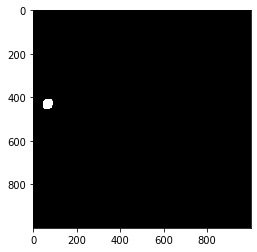

In [34]:
mask = '/home/eritup45/NYCU/VRDL/hw3_instance_segmentation/data/train/TCGA-18-5592-01Z-00-DX1/masks/mask_0049.png'
fpath = mask
img = cv2.imread(fpath, 0)

# threshold
ret, binary  = cv2.threshold(img, 128, 1, cv2.THRESH_BINARY)
contours = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    print("x,y,w,h:",x,y,w,h)

# print(ret)
# print(binary.max())
# print(binary)


# 小丑們

In [5]:
import os, sys
from PIL import Image

class RLEBitmap:
    width = 0
    height = 0
    pixels = None
    image = None
    
    #basic constructor
    def __init__(self):
        self.image = None
        self.pixels = None
        self.height = 0
        self.width = 0
    
    def open_png(self, filename):
        #open up the image
        self.image = Image.open(filename)
        # print(self.image.size)
        #get the pixel data
        self.pixels = self.image.load()
        #get the width and height 
        self.width, self.height = self.image.size
    
    def get_color_atpoint(self, point):
        #return the pixel color as a tuple, at the given point
        return (self.pixels[point[0], point[1]])
    
    #read an image from a file stream
    def read_rle_fromstream(self, stream):
        #colors used within the image, this can be a list and not a dictionary
        colors = []
        colorCount = 0
        colorIndex = 0
        
        #iterator data
        i = 0
        x = 0
        y = 0
        
        #reset bitmap data
        self.image = None
        self.pixels = None
        
        #read in and skip the first line, it's the header description
        stream.readline()
        #get the image width and height
        self.width = int(stream.readline().split(':')[1])
        self.height = int(stream.readline().split(':')[1])
        #skip the new line
        stream.readline()
        
        #set up our bitmap in memory
        self.image = Image.new("RGB", (self.width, self.height))
        
        #read in the image palette, and skip the first line as it's the palette description
        stream.readline()
        
        #interate through until we hit whitespace
        sI = stream.readline()
        while not sI.isspace():
            #split the line into rgb components
            sISplit = sI.split(',')
            #read in the values as an RGB tuple 
            colors.append((int(sISplit[0]), int(sISplit[1]), int(sISplit[2])))
            #read in the next new line
            sI = stream.readline()
        
        #now we read in the pixel count, and skip the first line as it's the header description
        stream.readline()
        
        #iterate through until we hit whitespae
        #first line
        sI = stream.readline()
        while not sI.isspace():
            #split the line into index/count components
            sISplit = sI.split(':')
            #get the RGB index value that we need based on index
            colorIndex = int(sISplit[0])
            #get the count of how many times we need to loop through this color
            colorCount = int(sISplit[1])
            
            i = 0
            for i in range(0, colorCount):
                self.image.putpixel((x, y), colors[colorIndex])
                x += 1
                
                if (x == (self.width)):
                    x = 0
                    y += 1
                    
            #read in the next new line    
            sI = stream.readline()
        
        #once the image has been constructed in memory, dump the pixel data into a table
        self.pixels = self.image.load()
        
    #write the image in memory to file 
    def write_memory_tofile(self, filename):
        if (self.image != None):
            self.image.save(filename)
    
    #write rle to an existing file stream
    def write_rle_tostream(self, stream):
        #colors used within the image
        colors = {}
        #store the RLE data
        pixels = []
        
        #store the color in use
        currentColor = None
        currentColorCount = 0
        
        #iterator data
        x = 0
        y = 0
        
        #iterate through image
        #row by row
        for y in range(0, self.height):
            #column by column
            for x in range(0, self.width):
                #get the current pixel
                newColor = self.pixels[x, y] 

                #compare new color versus existing color
                if newColor != currentColor:
                    #we don't want to do this if currentColor is nothing
                    if currentColor != None:
                        #add current (existing) color to our dictionary
                        #and give it an index value (lookup value)
                        #this is rudimentary lookup table for both saving the color data below and for saving/reading the file later
                        colors.setdefault(currentColor, len(colors.keys()))
                        #return the index value
                        colorIndex = colors[currentColor]
                        #add the color and pixel count to our list
                        pixels.append((colorIndex, currentColorCount))
                        
                        #set the new color to our currentcolor 
                        currentColor = newColor
                        #set the count equal to 1, as we need to count it as part of the new run
                        currentColorCount = 1
                    else:
                        currentColor = newColor
                        currentColorCount = 1   
                else:
                    currentColorCount += 1
                
        #flush out the last of the colors we were working on, into the array
        colors.setdefault(currentColor, len(colors.keys()))
        colorIndex = colors[currentColor]
        pixels.append((colorIndex, currentColorCount))

        #write everything out to the filestream
        #basic information
        stream.write('#Image Dimensions\n')
        stream.write('Width: %i \n' % (self.width))
        stream.write('Height: %i \n' % (self.height))
        stream.write('\n')
        
        #palette
        stream.write('#Image Palette\n')
        for v in colors.keys():
            stream.write('%i, %i, %i\n' % (v))
        stream.write('\n')
        
        #actual pixel count
        stream.write('#Pixel Count\n')
        for v in pixels:
            stream.write('%i: %i\n' % (v))
        stream.write('\n')
        
    
#some tests
#open up a PNG and write it to a RLE document
rb = RLEBitmap()
rb.open_png(mask)
fs = open('output\golfcourse.rle','w')
rb.write_rle_tostream(fs)
fs.close()

#open up that same RLE file and write it out to PNG
rb = RLEBitmap()
fs = open('output\golfcourse.rle','r')
rb.read_rle_fromstream(fs)
fs.close()
rb.write_memory_tofile('output\golfcourse_output.png')


(1000, 1000)


TypeError: not enough arguments for format string

In [5]:
'''
Fast inplementation of Run-Length Encoding algorithm
Takes only 200 seconds to process 5635 mask files
'''

import numpy as np
from PIL import Image
import os


def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths


if __name__ == '__main__':
    input_path = '../input/train'
    masks = [f for f in os.listdir(input_path) if f.endswith('_mask.tif')]
    masks = sorted(masks, key=lambda s: int(s.split('_')[0])*1000 + int(s.split('_')[1]))
    
    encodings = []
    N = 100     # process first N masks
    for i,m in enumerate(masks[:N]):
        if i % 10 == 0: print('{}/{}'.format(i, len(masks)))
        img = Image.open(os.path.join(input_path, m))
        x = np.array(img.getdata(), dtype=np.uint8).reshape(img.size[::-1])
        x = x // 255
        encodings.append(rle_encoding(x))
        
    #check output
    conv = lambda l: ' '.join(map(str, l)) # list -> string
    subject, img = 1, 1
    print('\n{},{},{}'.format(subject, img, conv(encodings[0])))
    
    # train_masks.csv:
    print('1,1,168153 9 168570 15 168984 22 169401 26 169818 30 170236 34 170654 36 171072 39 171489 42 171907 44 172325 46 172742 50 173159 53 173578 54 173997 55 174416 56 174834 58 175252 60 175670 62 176088 64 176507 65 176926 66 177345 66 177764 67 178183 67 178601 69 179020 70 179438 71 179857 71 180276 71 180694 73 181113 73 181532 73 181945 2 181950 75 182365 79 182785 79 183205 78 183625 78 184045 77 184465 76 184885 75 185305 75 185725 74 186145 73 186565 72 186985 71 187405 71 187825 70 188245 69 188665 68 189085 68 189506 66 189926 65 190346 63 190766 63 191186 62 191606 62 192026 61 192446 60 192866 59 193286 59 193706 58 194126 57 194546 56 194966 55 195387 53 195807 53 196227 51 196647 50 197067 50 197487 48 197907 47 198328 45 198749 42 199169 40 199589 39 200010 35 200431 33 200853 29 201274 27 201697 20 202120 15 202544 6')
    

FileNotFoundError: [Errno 2] No such file or directory: '../input/train'

shape: (1000, 1000)
encoded: {'size': [1000, 1000], 'counts': b'^U`23nn09L4L4M1O2N2M2N2O2N1O1O1O11O00O100O10O0100O01O100O1O2O0O100N3N1N3N1N3L4M5JgYkj0'}
dimg.shape: (1000, 1000)


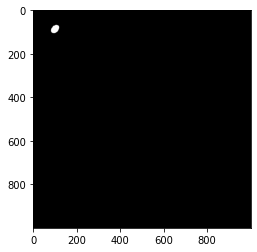

In [28]:
def show(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.show()

# read graysclae img
def RLE_encoding(img, bits=8,  binary=True, view=True):
    """
    img: Grayscale img.
    bits: what will be the maximum run length? 2^bits       
    """
    if binary:
        ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    if view:
        show(img)

    encoded = []
    shape = img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    th=127
    for pixel in fimg:
        if binary:
            if pixel<th:
                pixel=0
            else:
                pixel=1
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))
    
    return np.array(encoded)

# decode
def RLE_decode(encoded, shape):
    decoded=[]
    for rl in encoded:
        r,p = rl[0], rl[1]
        decoded.extend([p]*r)
    dimg = np.array(decoded).reshape(shape)
    return dimg

mask = '/home/eritup45/NYCU/VRDL/hw3_instance_segmentation/data/train/TCGA-18-5592-01Z-00-DX1/masks/mask_0001.png'
fpath = mask
img = cv2.imread(fpath, 0)
shape = img.shape

# encoded = RLE_encoding(img, bits=8)
# dimg = RLE_decode(encoded, shape)

encoded = encode(np.asfortranarray(img))
dimg = decode(encoded)

print(f'shape: {shape}')
print(f'encoded: {encoded}')
print(f'dimg.shape: {dimg.shape}')
show(dimg)




In [6]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure

ground_truth_binary_mask = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)

fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)
ground_truth_area = mask.area(encoded_ground_truth)
ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
contours = measure.find_contours(ground_truth_binary_mask, 0.5)

annotation = {
        "area": ground_truth_area.tolist(),
        "iscrowd": 0,
        "image_id": 123,
        "bbox": ground_truth_bounding_box.tolist(),
        "category_id": 1,
        "id": 1,
        "segmentation": []
    }

for contour in contours:
    contour = np.flip(contour, axis=1)
    segmentation = contour.ravel().tolist()
    annotation["segmentation"].append(segmentation)
    
print(json.dumps(annotation, indent=4))

{
    "segmentation": [
        [
            7.0,
            5.5,
            6.0,
            5.5,
            5.0,
            5.5,
            4.5,
            5.0,
            4.5,
            4.0,
            4.5,
            3.0,
            4.5,
            2.0,
            5.0,
            1.5,
            6.0,
            1.5,
            7.0,
            1.5,
            7.5,
            2.0,
            7.5,
            3.0,
            7.5,
            4.0,
            7.5,
            5.0,
            7.0,
            5.5
        ],
        [
            0.0,
            5.5,
            0.5,
            6.0,
            0.0,
            6.5
        ]
    ],
    "area": 13,
    "iscrowd": 0,
    "image_id": 123,
    "bbox": [
        0.0,
        2.0,
        8.0,
        5.0
    ],
    "category_id": 1,
    "id": 1
}
